# Coursera - Statistical Inference Project 

#### By Mandy Jiang  (03/02/2022) 

## Part I. A simulation exercise

In this project you will investigate the exponential distribution in R and compare it with the Central Limit Theorem.
The exponential distribution can be simulated in R with rexp(n, lambda) where lambda is the rate parameter.
The mean of exponential distribution is 1/lambda and the standard deviation is also 1/lambda. 
Set lambda = 0.2 for all of the simulations. You will investigate the distribution of averages of 40 exponentials.
Note that you will need to do a thousand simulations. \
Illustrate via simulation and associated explanatory text the properties of the distribution of the mean of 40 exponentials. You should: \
(1) Show the sample mean and compare it to the theoretical mean of the distribution. \
(2) Show how variable the sample is (via variance) and compare it to the theoretical variance of the distribution. \
(3) Show that the distribution is approximately normal. 


### Overview
We will study the exponential distribution and compare it with the expected distribution obtained by Central Limit Theorem. Firstly, we observe the distribution of 40 random exponential values with one simulation. Secondly, for the distribution of mean, we consider a mean of 40 exponential random values and simulated 1000 times. And then we focus on the comparison of this distribution to the one obtained by Central Limit Theorem.

### Distribution of 40 random exponential values in single simulation

[1] "theoretical_mean = 5"
[1] "sample_mean = 6.28"
[1] "theoretical_var = 25"
[1] "sample_var = 48.8601"


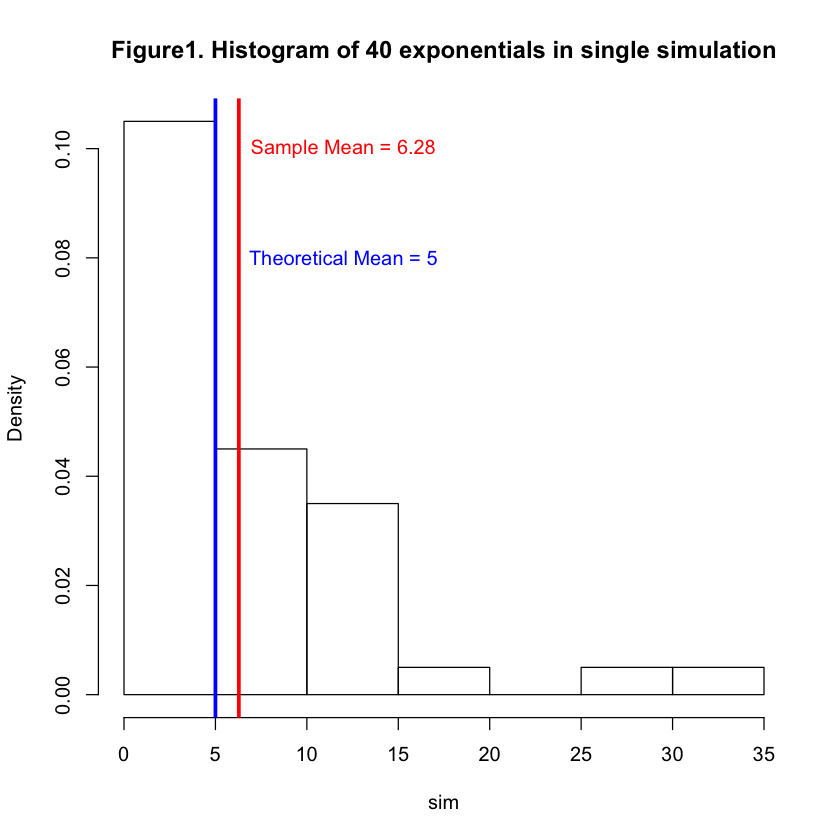

In [98]:
set.seed(20)
par(mfrow = c(1,1), mfcol = c(1,1))
n = 40
lambda = 0.2
sim = rexp(n, lambda)
sample_mean = round(mean(sim),2)
sample_sd = round(sd(sim),2)
theoretical_mean = round(1/lambda,2)
theoretical_sd = round(1/lambda,2)
hist(sim,main = "Figure1. Histogram of 40 exponentials in single simulation", freq=FALSE)
abline(v = sample_mean, col = "red", lwd = 3)
abline(v = theoretical_mean, col = "blue", lwd = 3)
text(x = 12, y = 0.1, paste("Sample Mean =", sample_mean), col = "red",cex = 1)
text(x = 12, y = 0.08, paste("Theoretical Mean =", theoretical_mean), col = "blue",cex = 1)

print(paste("theoretical_mean = ",theoretical_mean,sep="")) 
print(paste("sample_mean = ",sample_mean,sep=""))
print(paste("theoretical_var = ",(theoretical_sd)^2,sep="")) 
print(paste("sample_var = ",(sample_sd)^2,sep=""))

In single simulation, \
(1) the difference between theoretical and observed mean is 6.28-5 = 1.28 \
(2) the difference between theoretical and observed variance is 25-48.86 = -23.86, indicating that one-time sampling has more variances than expected

### Distribution of 40 random exponential values in 1000 simulations

[1] "sample_mean = 4.96"
[1] "sample_var = 0.5929"


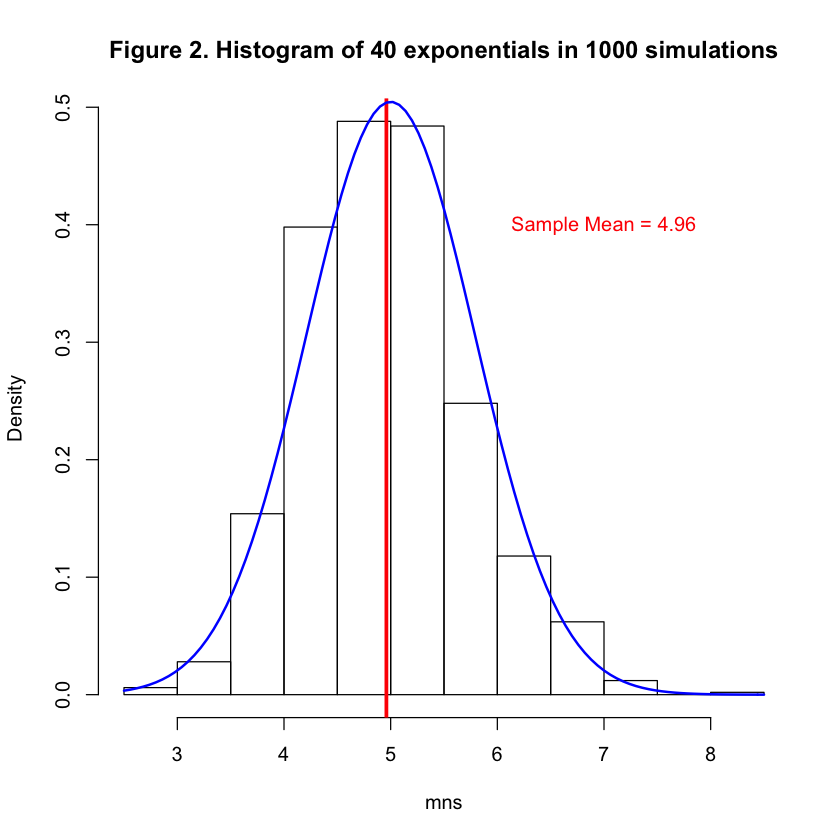

In [99]:
set.seed(20)
par(mfrow = c(1,1), mfcol = c(1,1))
n = 40
lambda = 0.2
mns = NULL
for (i in 1 : 1000) mns = c(mns, mean(rexp(n, lambda)))
hist(mns,main = "Figure 2. Histogram of 40 exponentials in 1000 simulations",freq=FALSE)
sample_mean = round(mean(mns),2)
sample_sd = round(sd(mns),2)

abline(v = sample_mean, col = "red", lwd = 3)
text(x = 7, y = 0.4, paste("Sample Mean =", sample_mean), col = "red",cex = 1)
curve(dnorm(x, mean=1/lambda, sd=1/lambda/sqrt(n)), col="blue", lwd=2, add=TRUE, yaxt="n")

print(paste("sample_mean = ",sample_mean,sep=""))
print(paste("sample_var = ",(sample_sd)^2,sep=""))

Based on the Central Limit Theorem, the distribution of means from 1000 simulations should be more prone to normal distribution (blue curve in Figure 2). The theoretical mean is 1/lambda = 1/0.2 = 5 and theoretical variance is ((1/lambda)^2)/n = ((1/0.2)^2)/40 = 0.625.

(1) Sample Mean versus Theoretical Mean: \
In Figure2, the sample mean is 4.96 (red line), and difference (theoretical mean - sample mean) = 5-4.96 = 0.04.

(2) Sample Variance versus Theoretical Variance: \
In Figure2, the sample variance is 0.5929, and difference (theoretical variance - sample variance) = 0.625-0.5929 = 0.0321.

(3) Explain how one can tell the distribution is approximately normal: \
We simulate the normal distribution curve in Figure 2 (blue curve), and the data looks like normally dirstibuted.
We then compare the confidence interval between theoretical and sample estimations. If they have a small difference, the distribution tends to be normally distributed.

In [102]:
# 95% Theoretical confident interval
n=40
lambda=0.2
theoretical_mean = 1/lambda
theoretical_sd = (1/lambda)/sqrt(n)
tci<- theoretical_mean +c(-1,1)*1.96 * theoretical_sd/sqrt(n)
tci

[1] 4.755 5.245

In [103]:
# 95% Observed confident interval
sample_mean = mean(mns)
sample_sd = sd(mns)
oci<- sample_mean +c(-1,1)*1.96 * sample_sd/sqrt(n)
oci

[1] 4.725390 5.202267

The 95% confident interval is very similar between observed and theoretical estimations. In addition, by comparing  single simulation (Figure 1) and 1000 simulations (Figure 2), larger sample size drives the distribution to be more normally distributed, and more follow the rule of the central limit theorem.